# Importing required libraries/modules

In [101]:
%matplotlib inline

In [174]:
import fitz
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

# Load quarterly press earnings call transcripts from Alibaba

In [8]:
# loading FY18 press releases
q4_fy18 = 'q4 fy18.pdf'

# loading FY19 press releases
q3_fy19, q4_fy19 = 'q3 fy19.pdf', 'q4 fy19.pdf' 

# loading FY20 press releases
q1_fy20, q2_fy20, q3_fy20, q4_fy20 = 'q1 fy20.pdf', 'q2 fy20.pdf', 'q3 fy20.pdf', 'q4 fy20.pdf'

# loading FY21 press releases
q1_fy21, q2_fy21, q3_fy21, q4_fy21 = 'q1 fy21.pdf', 'q2 fy21.pdf', 'q3 fy21.pdf', 'q4 fy21.pdf'

# loading FY22 press releases
q1_fy22, q2_fy22, q3_fy22, q4_fy22 = 'q1 fy22.pdf', 'q2 fy22.pdf', 'q3 fy22.pdf', 'q4 fy22.pdf'

# loading FY23 press releases
q1_fy23, q2_fy23, q3_fy23, q4_fy23 = 'q1 fy23.pdf', 'q2 fy23.pdf', 'q3 fy23.pdf', 'q4 fy23.pdf'

# loading FY24 press releases
q1_fy24, q2_fy24 = 'q1 fy24.pdf', 'q2 fy24.pdf'


index = ['Q4 FY18', 'Q3 FY19', 'Q4 FY19', 'Q1 FY20', 'Q2 FY20', 'Q3 FY20', 'Q4 FY20', 'Q1 FY21', 'Q2 FY21', 'Q3 FY21', 'Q4 FY21', 'Q1 FY22', 'Q2 FY22', 'Q3 FY22', 'Q4 FY22', 'Q1 FY23', 'Q2 FY23', 'Q3 FY23', 'Q4 FY23', 'Q1 FY24', 'Q2 FY24']

# Create an algorithm to check number of occurrences of certain words

In [47]:
def count_word_occurrences(pdf_path, target_word):
    doc = fitz.open(pdf_path)
    total_occurrences = 0

    for page_number in range(doc.page_count):
        page = doc[page_number]
        text = page.get_text()
        occurrences_on_page = text.lower().count(target_word.lower())
        total_occurrences += occurrences_on_page

    doc.close()
    return total_occurrences


def return_list_count(target_word):
    # Occurrences for FY18
    occurrences_q4_fy18 = count_word_occurrences(q4_fy18, target_word)

    # Occurrences for FY19
    occurrences_q3_fy19, occurrences_q4_fy19 = count_word_occurrences(q3_fy19, target_word), count_word_occurrences(q4_fy19, target_word)

    # Occurrences for FY20
    occurrences_q1_fy20, occurrences_q2_fy20, occurrences_q3_fy20, occurrences_q4_fy20 = count_word_occurrences(q1_fy20, target_word), count_word_occurrences(q2_fy20, target_word), count_word_occurrences(q3_fy20, target_word), count_word_occurrences(q4_fy20, target_word)

    # Occurrences for FY21
    occurrences_q1_fy21, occurrences_q2_fy21, occurrences_q3_fy21, occurrences_q4_fy21 = count_word_occurrences(q1_fy21, target_word), count_word_occurrences(q2_fy21, target_word), count_word_occurrences(q3_fy21, target_word), count_word_occurrences(q4_fy21, target_word)

    # Occurrences for FY22
    occurrences_q1_fy22, occurrences_q2_fy22, occurrences_q3_fy22, occurrences_q4_fy22 = count_word_occurrences(q1_fy22, target_word), count_word_occurrences(q2_fy22, target_word), count_word_occurrences(q3_fy22, target_word), count_word_occurrences(q4_fy22, target_word)

    # Occurrences for FY23
    occurrences_q1_fy23, occurrences_q2_fy23, occurrences_q3_fy23, occurrences_q4_fy23 = count_word_occurrences(q1_fy23, target_word), count_word_occurrences(q2_fy23, target_word), count_word_occurrences(q3_fy23, target_word), count_word_occurrences(q4_fy23, target_word)

    # Occurrences for FY24
    occurrences_q1_fy24, occurrences_q2_fy24 = count_word_occurrences(q1_fy24, target_word), count_word_occurrences(q2_fy24, target_word)

    target_words_per_call = np.array([occurrences_q4_fy18, occurrences_q3_fy19, occurrences_q4_fy19, occurrences_q1_fy20, occurrences_q2_fy20, occurrences_q3_fy20, occurrences_q4_fy20, occurrences_q1_fy21, occurrences_q2_fy21, occurrences_q3_fy21, occurrences_q4_fy21, occurrences_q1_fy22, occurrences_q2_fy22, occurrences_q3_fy22, occurrences_q4_fy22, occurrences_q1_fy23, occurrences_q2_fy23, occurrences_q3_fy23, occurrences_q4_fy23, occurrences_q1_fy24, occurrences_q2_fy24])


    def count_words_in_pdf(pdf_path):
        # Open the PDF file
        pdf_document = fitz.open(pdf_path)

        # Initialize word count
        total_words = 0

        # Iterate through all pages
        for page_number in range(pdf_document.page_count):
            # Get the text of the page
            page = pdf_document[page_number]
            text = page.get_text()

            # Count words in the text
            words = text.split()
            total_words += len(words)

        # Close the PDF document
        pdf_document.close()

        return total_words

    
    # Occurrences for FY18
    occurrences_q4_fy18 = count_words_in_pdf(q4_fy18)

    # Occurrences for FY19
    occurrences_q3_fy19, occurrences_q4_fy19 = count_words_in_pdf(q3_fy19), count_words_in_pdf(q4_fy19)

    # Occurrences for FY20
    occurrences_q1_fy20, occurrences_q2_fy20, occurrences_q3_fy20, occurrences_q4_fy20 = count_words_in_pdf(q1_fy20), count_words_in_pdf(q2_fy20), count_words_in_pdf(q3_fy20), count_words_in_pdf(q4_fy20)

    # Occurrences for FY21
    occurrences_q1_fy21, occurrences_q2_fy21, occurrences_q3_fy21, occurrences_q4_fy21 = count_words_in_pdf(q1_fy21), count_words_in_pdf(q2_fy21), count_words_in_pdf(q3_fy21), count_words_in_pdf(q4_fy21)

    # Occurrences for FY22
    occurrences_q1_fy22, occurrences_q2_fy22, occurrences_q3_fy22, occurrences_q4_fy22 = count_words_in_pdf(q1_fy22), count_words_in_pdf(q2_fy22), count_words_in_pdf(q3_fy22), count_words_in_pdf(q4_fy22)

    # Occurrences for FY23
    occurrences_q1_fy23, occurrences_q2_fy23, occurrences_q3_fy23, occurrences_q4_fy23 = count_words_in_pdf(q1_fy23), count_words_in_pdf(q2_fy23), count_words_in_pdf(q3_fy23), count_words_in_pdf(q4_fy23)

    # Occurrences for FY24
    occurrences_q1_fy24, occurrences_q2_fy24 = count_words_in_pdf(q1_fy24), count_words_in_pdf(q2_fy24)

    total_words_per_call = np.array([occurrences_q4_fy18, occurrences_q3_fy19, occurrences_q4_fy19, occurrences_q1_fy20, occurrences_q2_fy20, occurrences_q3_fy20, occurrences_q4_fy20, occurrences_q1_fy21, occurrences_q2_fy21, occurrences_q3_fy21, occurrences_q4_fy21, occurrences_q1_fy22, occurrences_q2_fy22, occurrences_q3_fy22, occurrences_q4_fy22, occurrences_q1_fy23, occurrences_q2_fy23, occurrences_q3_fy23, occurrences_q4_fy23, occurrences_q1_fy24, occurrences_q2_fy24])
    
    # Return a target word adjusted metric for n-words /call in %                                                                                                          
    return (target_words_per_call / total_words_per_call) * 100

### Target  Word: Europe / European

In [48]:
# Target word
target_word = "Europe"

result_list_europe = return_list_count(target_word)


# Target word
target_word = 'European'

result_list_european = return_list_count(target_word)


# Total for this word
result_list_europe = result_list_europe + result_list_european

### Target Word: Asia 

In [49]:
# Target word
target_word = "Asia"

result_list_asia = return_list_count(target_word)


# Target word
target_word = 'Asian'

result_list_asian = return_list_count(target_word)


# Total for this word
result_list_asia = result_list_asia + result_list_asian

### Target Word: Africa 

In [50]:
# Target word
target_word = "Africa"

result_list_africa = return_list_count(target_word)


# Target word
target_word = 'African'

result_list_african = return_list_count(target_word)


# Total for this word
result_list_africa = result_list_africa + result_list_african

### Target Word: America

In [51]:
# Target word
target_word = "America"

result_list_america = return_list_count(target_word)


# Target word
target_word = 'American'

result_list_american = return_list_count(target_word)


# Total for this word
result_list_america = result_list_america + result_list_american

### Target Word: Oceania

In [52]:
# Target word
target_word = "Oceania"


# Total for this word
result_list_oceania = return_list_count(target_word)

### Target Word: China / Chinese

In [53]:
# Target word
target_word = "China"

result_list_china = return_list_count(target_word)


# Target word
target_word = 'Chinese'

result_list_chinese = return_list_count(target_word)


# Total for this word
result_list_china = result_list_china + result_list_chinese

### Target Word: Japan / Japanese

In [54]:
# Target word
target_word = "Japan"

result_list_japan = return_list_count(target_word)


# Target word
target_word = 'Japanese'

result_list_japanese = return_list_count(target_word)


# Total for this word
result_list_japan = result_list_japan + result_list_japanese

### Target Word: South Korea / South Korean

In [55]:
# Target word
target_word = "South Korea"

result_list_south_korea = return_list_count(target_word)


# Target word
target_word = 'South Korean'

result_list_south_korean = return_list_count(target_word)


# Total for this word
result_list_south_korea = result_list_south_korea + result_list_south_korean

### Target Word: Vietnam / Vietnamese

In [56]:
# Target word
target_word = "Vietnam"

result_list_vietnam = return_list_count(target_word)


# Target word
target_word = 'Vietnamese'

result_list_vietnamese = return_list_count(target_word)


# Total for this word
result_list_vietnam = result_list_vietnam + result_list_vietnamese

### Target Word: Singapore / Singaporean

In [57]:
# Target word
target_word = "Singapore"

result_list_singapore = return_list_count(target_word)


# Target word
target_word = 'Singaporean'

result_list_singaporean = return_list_count(target_word)


# Total for this word
result_list_singapore = result_list_singapore + result_list_singaporean

### Target Word: Thailand / Thai

In [58]:
# Target word
target_word = "Thailand"

result_list_thailand = return_list_count(target_word)


# Target word
target_word = 'Thai'

result_list_thai = return_list_count(target_word)


# Total for this word
result_list_thailand = result_list_thailand + result_list_thai

### Target Word: Philippines

In [59]:
# Target word
target_word = "Philippines"

result_list_philippines = return_list_count(target_word)

### Target Word: Kong

In [60]:
# Target word
target_word = "Kong"

result_list_hong_kong = return_list_count(target_word)

### Target Word: Indonesia / Indonesian

In [61]:
# Target word
target_word = "Indonesia"

result_list_indonesia = return_list_count(target_word)


# Target word
target_word = 'Indonesian'

result_list_indonesian = return_list_count(target_word)


# Total for this word
result_list_indonesia = result_list_indonesia + result_list_indonesian

### Target Word: Malaysia / Malaysian

In [62]:
# Target word
target_word = "Malaysia"

result_list_malaysia = return_list_count(target_word)


# Target word
target_word = 'Malaysian'

result_list_malaysian = return_list_count(target_word)


# Total for this word
result_list_malaysia = result_list_malaysia + result_list_malaysian

### Target Word: India / Indian

In [63]:
# Target word
target_word = "India"

result_list_india = return_list_count(target_word)


# Target word
target_word = 'Indian'

result_list_indian = return_list_count(target_word)


# Total for this word
result_list_india = result_list_india + result_list_indian

### Target Word: Mongolia / Mongolian

In [64]:
# Target word
target_word = "Mongolia"

result_list_mongolia = return_list_count(target_word)


# Target word
target_word = 'Mongolian'

result_list_mongolian = return_list_count(target_word)


# Total for this word
result_list_mongolia = result_list_mongolia + result_list_mongolian

### Target Word: Russia / Russian

In [65]:
# Target word
target_word = "Russia"

result_list_russia = return_list_count(target_word)


# Target word
target_word = 'Russian'

result_list_russian = return_list_count(target_word)


# Total for this word
result_list_russia = result_list_russia + result_list_russian

### Target Word: France / French

In [66]:
# Target word
target_word = "France"

result_list_france = return_list_count(target_word)


# Target word
target_word = 'French'

result_list_french = return_list_count(target_word)


# Total for this word
result_list_france = result_list_france + result_list_french

### Target Word: Germany / German

In [67]:
# Target word
target_word = "Germany"

result_list_germany = return_list_count(target_word)


# Target word
target_word = 'German'

result_list_german = return_list_count(target_word)


# Total for this word
result_list_germany = result_list_germany + result_list_german

### Target Word: Belgium / Belgian

In [68]:
# Target word
target_word = "Belgium"

result_list_belgium = return_list_count(target_word)


# Target word
target_word = 'Belgian'

result_list_belgian = return_list_count(target_word)


# Total for this word
result_list_belgium = result_list_belgium + result_list_belgian

### Target Word: Spain / Spanish

In [69]:
# Target word
target_word = "Spain"

result_list_spain = return_list_count(target_word)


# Target word
target_word = 'Spanish'

result_list_spanish = return_list_count(target_word)


# Total for this word
result_list_spain = result_list_spain + result_list_spanish

### Target Word: Italy / Italian

In [70]:
# Target word
target_word = "Italy"

result_list_italy = return_list_count(target_word)


# Target word
target_word = 'Italian'

result_list_italian = return_list_count(target_word)


# Total for this word
result_list_italy = result_list_italy + result_list_italian

### Target Word: UK / United Kingdom / Britain / British

In [71]:
# Target word
target_word = "UK"

result_list_uk = return_list_count(target_word)


# Target word
target_word = 'United Kingdom'

result_list_united_kingdom = return_list_count(target_word)


# Target word
target_word = 'Britain'

result_list_britain = return_list_count(target_word)


# Target word
target_word = 'British'

result_list_british = return_list_count(target_word)


# Total for this word
result_list_uk = result_list_uk + result_list_united_kingdom + result_list_britain + result_list_british

### Target Word: Canada / Canadian

In [72]:
# Target word
target_word = "Canada"

result_list_canada = return_list_count(target_word)


# Target word
target_word = 'Canadian'

result_list_canadian = return_list_count(target_word)


# Total for this word
result_list_canada = result_list_canada + result_list_canadian

### Target Word: United States / USA / States

In [73]:
# Target word
target_word = "United States"

result_list_united_states = return_list_count(target_word)


# Target word
target_word = 'USA'

result_list_usa = return_list_count(target_word)


# Target word
target_word = 'States'

result_list_states = return_list_count(target_word)


# Total for this word
result_list_usa = result_list_usa + result_list_united_states + result_list_states

### Target Word: Mexico / Mexican

In [74]:
# Target word
target_word = "Mexico"

result_list_mexico = return_list_count(target_word)


# Target word
target_word = 'Mexican'

result_list_mexican = return_list_count(target_word)


# Total for this word
result_list_mexico = result_list_mexico + result_list_mexican

### Target Word: Brazil / Brazilian

In [75]:
# Target word
target_word = "Brazil"

result_list_brazil = return_list_count(target_word)


# Target word
target_word = 'Brazilian'

result_list_brazilian = return_list_count(target_word)


# Total for this word
result_list_brazil = result_list_brazil + result_list_brazilian

### Target Word: Argentina / Argentinian

In [76]:
# Target word
target_word = "Argentina"

result_list_argentina = return_list_count(target_word)


# Target word
target_word = 'Argentinian'

result_list_argentinian = return_list_count(target_word)


# Total for this word
result_list_argentina = result_list_argentina + result_list_argentinian

# Regroup Data

### Per Region

In [134]:
# Raw Data
df_region = pd.DataFrame(data={'Europe': result_list_europe, 
                        'Asia': result_list_asia,
                        'Africa': result_list_africa,
                        'Americas': result_list_america,
                        'Oceania': result_list_oceania,                      
                       },
                 index=index)

In [78]:
# With Total
df_region_copy = df_region.copy()
df_region_copy.loc[len(df_region_copy)] = {'Europe': df_region_copy.Europe.sum(),
                             'Asia': df_region_copy.Asia.sum(),
                             'Africa': df_region_copy.Africa.sum(),
                             'Americas': df_region_copy.Americas.sum(),
                             'Oceania': df_region_copy.Oceania.sum()
                            }

a = list(df_region_copy.index)
a[-1] = 'Total'
df_region_copy.index = a
df_region_copy

,Europe,Asia,Africa,Americas,Oceania
Q4 FY18,0.000000,0.238854,0.0,0.026539,0.0
Q3 FY19,0.012776,0.012776,0.0,0.025553,0.0
Q4 FY19,0.028827,0.028827,0.0,0.086480,0.0
Q1 FY20,0.000000,0.014952,0.0,0.044856,0.0
Q2 FY20,0.000000,0.023841,0.0,0.035761,0.0
Q3 FY20,0.000000,0.000000,0.0,0.026243,0.0
Q4 FY20,0.000000,0.000000,0.0,0.038855,0.0
Q1 FY21,0.000000,0.161054,0.0,0.073206,0.0
Q2 FY21,0.000000,0.014276,0.0,0.028551,0.0
Q3 FY21,0.000000,0.026994,0.0,0.040491,0.0


### Per Country

In [79]:
# Raw Data
df_country = pd.DataFrame(data={'China': result_list_china, 
                        'Japan': result_list_japan,
                        'South Korea': result_list_south_korea,
                        'Vietnam': result_list_vietnam,
                        'Singapore': result_list_singapore,
                        'Thailand': result_list_thailand, 
                        'Philippines': result_list_philippines,
                        'Hong Kong': result_list_hong_kong,
                        'Indonesia': result_list_indonesia,
                        'Malaysia': result_list_malaysia, 
                        'India': result_list_india, 
                        'Mongolia': result_list_mongolia,
                        'Russia': result_list_russia,
                        'France': result_list_france,
                        'Germany': result_list_germany,
                        'Belgium': result_list_belgium, 
                        'Spain': result_list_spain,
                        'Italy': result_list_italy,
                        'UK': result_list_uk,
                        'Canada': result_list_canada,
                        'USA': result_list_usa, 
                        'Mexico': result_list_mexico,
                        'Brazil': result_list_brazil,
                        'Argentina': result_list_argentina,
                       },
                 index=index)

In [80]:
# With Total
df_country_copy = df_country.copy()
df_country_copy.loc[len(df_country_copy)] = {'China': df_country_copy.China.sum(), 
                        'Japan': df_country_copy.Japan.sum(),
                        'South Korea': df_country_copy['South Korea'].sum(),
                        'Vietnam': df_country_copy.Vietnam.sum(),
                        'Singapore': df_country_copy.Singapore.sum(),
                        'Thailand': df_country_copy.Thailand.sum(), 
                        'Philippines': df_country_copy.Philippines.sum(),
                        'Hong Kong': df_country_copy['Hong Kong'].sum(),
                        'Indonesia': df_country_copy.Indonesia.sum(),
                        'Malaysia': df_country_copy.Malaysia.sum(), 
                        'India': df_country_copy.India.sum(), 
                        'Mongolia': df_country_copy.Mongolia.sum(),
                        'Russia': df_country_copy.Russia.sum(),
                        'France': df_country_copy.France.sum(),
                        'Germany': df_country_copy.Germany.sum(),
                        'Belgium': df_country_copy.Belgium.sum(), 
                        'Spain': df_country_copy.Spain.sum(),
                        'Italy': df_country_copy.Italy.sum(),
                        'UK': df_country_copy.UK.sum(),
                        'Canada': df_country_copy.Canada.sum(),
                        'USA': df_country_copy.USA.sum(), 
                        'Mexico': df_country_copy.Mexico.sum(),
                        'Brazil': df_country_copy.Brazil.sum(),
                        'Argentina': df_country_copy.Argentina.sum(),
                       }


b = list(df_country_copy.index)
b[-1] = 'Total'
df_country_copy.index = b

df_country_copy

,China,Japan,South Korea,Vietnam,Singapore,Thailand,Philippines,Hong Kong,Indonesia,Malaysia,...,Germany,Belgium,Spain,Italy,UK,Canada,USA,Mexico,Brazil,Argentina
Q4 FY18,0.557325,0.0,0.0,0.000000,0.0,0.026539,0.00000,0.000000,0.026539,0.013270,...,0.000000,0.0,0.000000,0.0,0.053079,0.0,0.066348,0.0,0.0,0.0
Q3 FY19,0.562157,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.051105,0.0,0.038329,0.0,0.0,0.0
Q4 FY19,0.965696,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.014413,0.0,0.000000,0.0,0.028827,0.0,0.0,0.0
Q1 FY20,0.358852,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.044856,0.0,0.000000,0.0,0.0,0.0
Q2 FY20,0.393372,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.011920,0.000000,...,0.000000,0.0,0.000000,0.0,0.023841,0.0,0.000000,0.0,0.0,0.0
Q3 FY20,0.459257,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.065608,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
Q4 FY20,0.803005,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.025903,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.012952,0.0,0.025903,0.0,0.0,0.0
Q1 FY21,0.614934,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.029283,0.0,0.058565,0.0,0.0,0.0
Q2 FY21,0.371163,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.014276,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.014276,0.0,0.000000,0.0,0.0,0.0
Q3 FY21,0.472398,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.013497,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.013497,0.0,0.040491,0.0,0.0,0.0


# Plotting the data

### Per Region

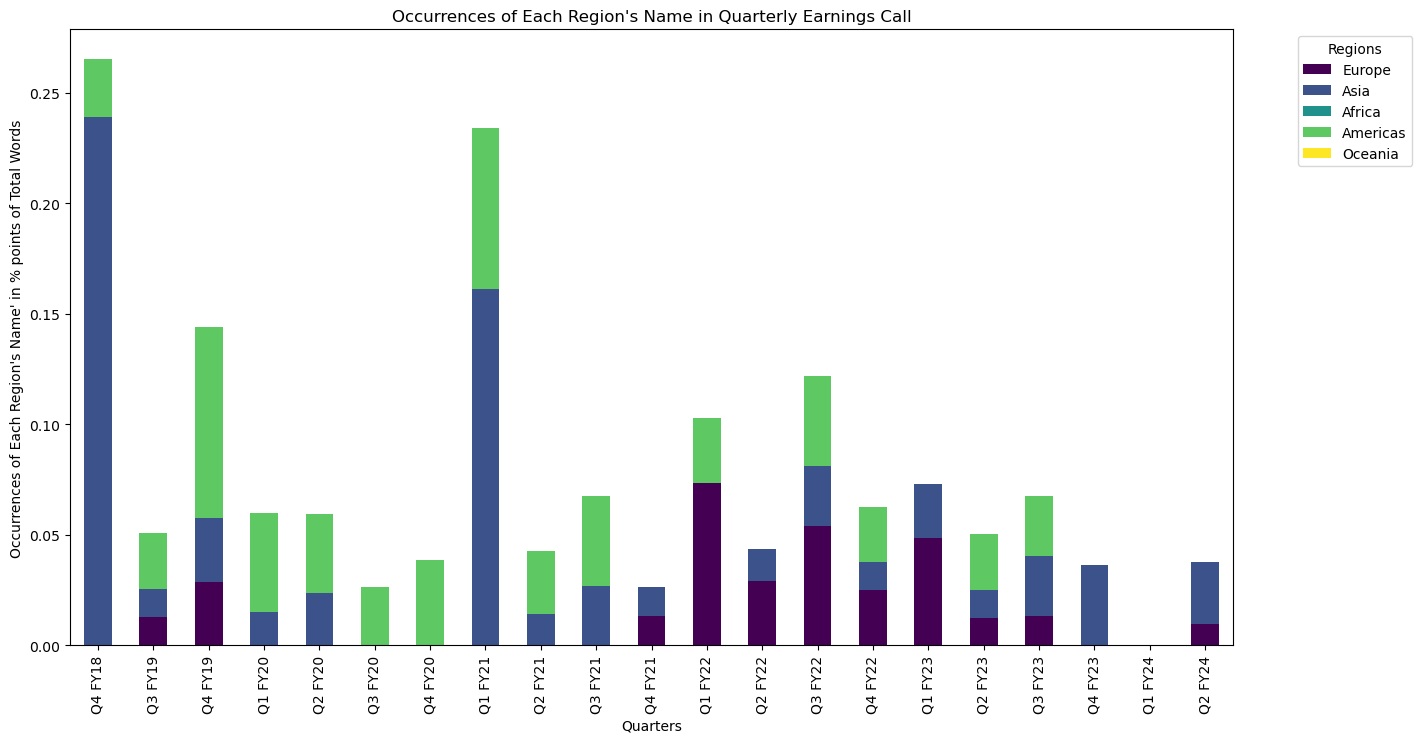

In [141]:
df_region.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title("Occurrences of Each Region's Name in Quarterly Earnings Call")
plt.xlabel('Quarters')
plt.ylabel("Occurrences of Each Region's Name' in % points of Total Words")
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left');

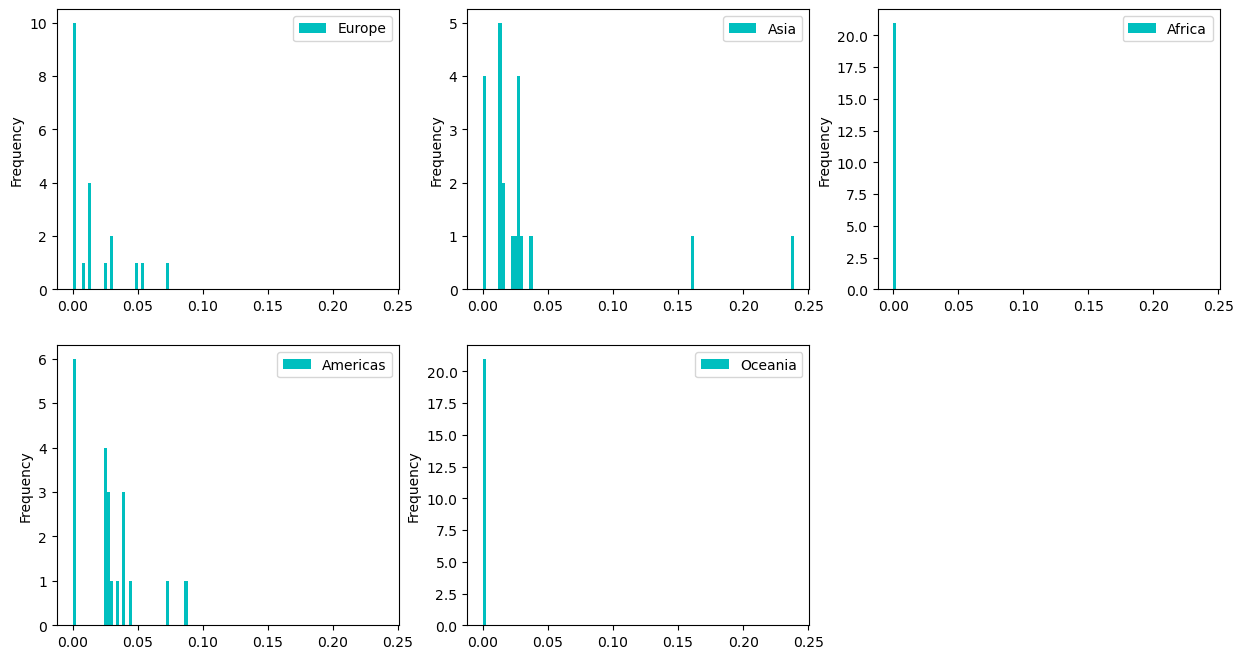

In [149]:
# Plot separate histograms for each region
df_region.plot(kind='hist', subplots=True, layout=(2, 3), figsize=(15, 8), sharex=False, sharey=False, bins=100, color='c');

### Per Country

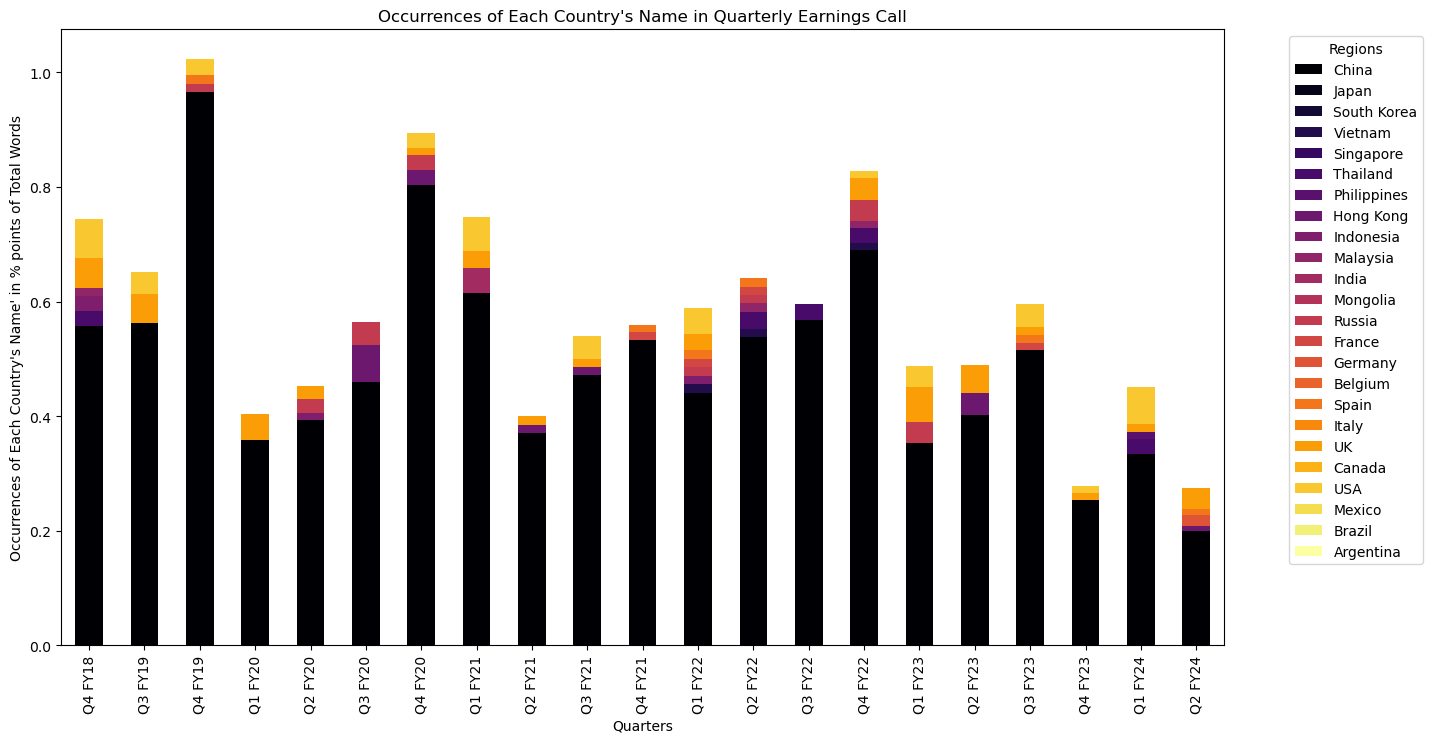

In [154]:
df_country.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='inferno')
plt.title("Occurrences of Each Country's Name in Quarterly Earnings Call")
plt.xlabel('Quarters')
plt.ylabel("Occurrences of Each Country's Name' in % points of Total Words")
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left');

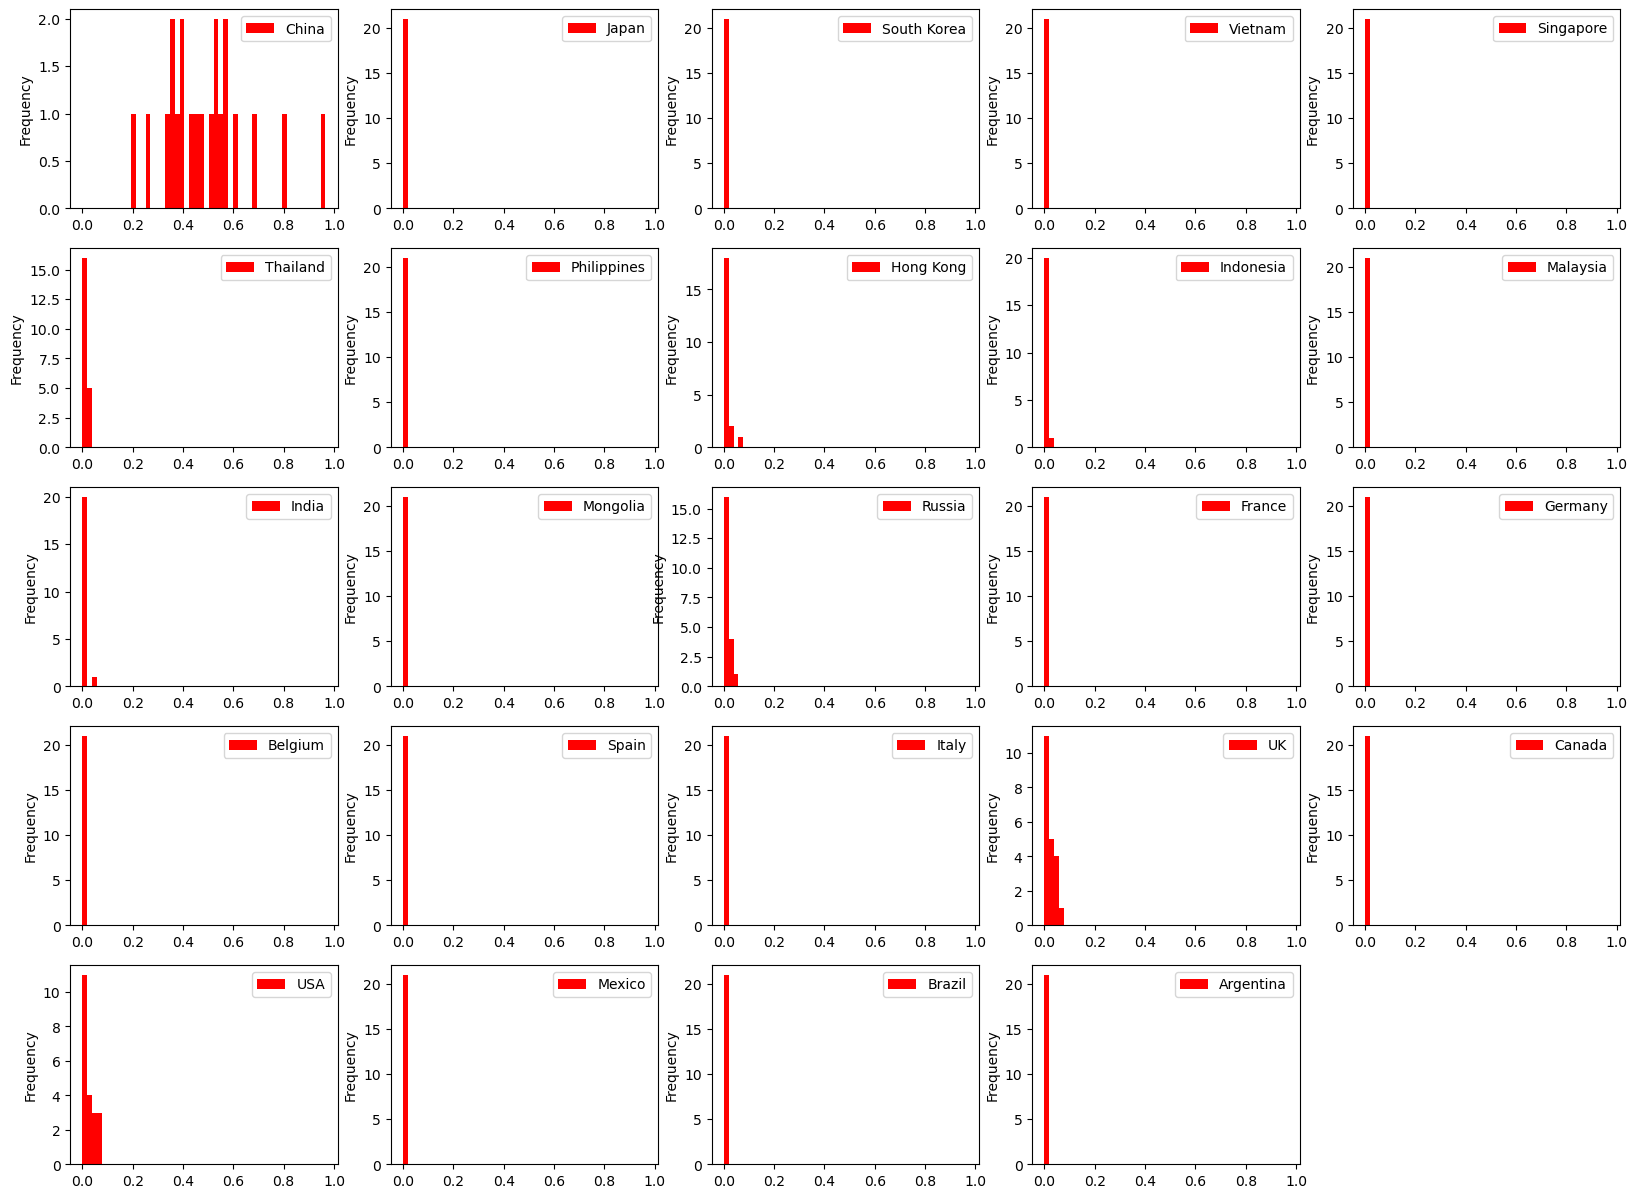

In [170]:
# Plot separate histograms for each country
df_country.plot(kind='hist', subplots=True, layout=(5, 5), figsize=(20, 15), sharex=False, sharey=False, bins=50, color='r');